<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/ml_intro/blob/main/2_planificacion/redes_neuronales_geron/chapter_10/pagina_485_3th_edition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/marco-canas/ml_intro/blob/main/2_planificacion/redes_neuronales_geron/chapter_10/pagina_485_3th_edition.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

Esta es la traducción al español del texto del capítulo 10 de *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow* de Aurélien Géron:





# **MLPs para Regresión**  



En primer lugar, las redes neuronales multicapa (*MLPs*) pueden utilizarse para tareas de regresión. 

Si deseas predecir un único valor (por ejemplo, el precio de una casa dadas varias de sus características), solo necesitas una neurona de salida: su resultado será el valor predicho. 

Para regresión multivariante (es decir, predecir múltiples valores a la vez), necesitas una neurona de salida por cada dimensión de salida. 

Por ejemplo, para localizar el centro de un objeto en una imagen, necesitas predecir coordenadas en 2D, por lo que requieres dos neuronas de salida. 

<img src = 'centro_imagen_gira_sol.png'>

Si además quieres dibujar un *bounding box* (rectángulo delimitador) alrededor del objeto, necesitas dos números más: el ancho y el alto del objeto. Así, terminarías con cuatro neuronas de salida.  

<img src = 'https://docs.aws.amazon.com/images/textract/latest/dg/images/bounding-box.png'>


Scikit-Learn incluye la clase **`MLPRegressor`**, así que vamos a usarla para construir una MLP con tres capas ocultas de 50 neuronas cada una y entrenarla en el conjunto de datos de viviendas de California. 

Para simplificar, utilizaremos la función **`fetch_california_housing()`** de Scikit-Learn para cargar los datos. 

Este conjunto es más simple que el que usamos en el Capítulo 2, ya que solo contiene características numéricas (no incluye la característica *ocean_proximity*) y no tiene valores faltantes.  



El siguiente código comienza cargando y dividiendo el conjunto de datos, luego crea un *pipeline* para estandarizar las características de entrada antes de pasarlas al **`MLPRegressor`**. 

Esto es muy importante para las redes neuronales, ya que se entrenan mediante *gradiente descendente*, y como vimos en el Capítulo 4, el gradiente descendente no converge bien cuando las características tienen escalas muy diferentes.  



Finalmente, el código entrena el modelo y evalúa su error de validación. 

El modelo usa la función de activación **ReLU** en las capas ocultas y una variante del gradiente descendente llamada **Adam** (ver Capítulo 11) para minimizar el *error cuadrático medio (MSE)*, con un poco de regularización **ℓ₂** (controlable mediante el hiperparámetro **`alpha`**):  


In [1]:

from sklearn.datasets import fetch_california_housing # obtención del 
from sklearn.metrics import root_mean_squared_error # métrica de error
from sklearn.model_selection import train_test_split # división de datos
from sklearn.neural_network import MLPRegressor # red neuronal
from sklearn.pipeline import make_pipeline # pipeline
from sklearn.preprocessing import StandardScaler # escalado de datos


In [2]:
%%time 
housing = fetch_california_housing() # obtención del dataset california_housing 


CPU times: total: 15.6 ms
Wall time: 83 ms


In [3]:
type(housing)

sklearn.utils._bunch.Bunch

In [4]:
housing.keys() 

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [6]:
housing.data, housing.data.shape  

(array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 (20640, 8))

In [7]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [8]:
housing.frame

In [9]:
housing 

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [10]:
from pathlib import Path
import pandas as pd
import tarfile # tarfile módulo para 
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing_geron = load_housing_data()
housing_geron.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)


In [12]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)


In [13]:

%%time 
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42) # instancia MLPRegressor con 3 capas ocultas de 50 neuronas cada una


CPU times: total: 0 ns
Wall time: 0 ns


In [14]:
%%time 
pipeline = make_pipeline(StandardScaler(), mlp_reg) # creamos un pipeline con escalado estandar y el modelo mlp_reg


CPU times: total: 0 ns
Wall time: 0 ns


In [15]:
%%time 
pipeline.fit(X_train, y_train) # entrenar el pipeline con los datos de entrenamiento


CPU times: total: 9.17 s
Wall time: 9.35 s


,steps,"[('standardscaler', ...), ('mlpregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,loss,'squared_error'
,hidden_layer_sizes,"[50, 50, ...]"
,activation,'relu'
,solver,'adam'


In [16]:
%%time 
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=42)

pipeline2 = make_pipeline(StandardScaler(), rf_reg)

pipeline2.fit(X_train, y_train)

CPU times: total: 9.14 s
Wall time: 9.42 s


,steps,"[('standardscaler', ...), ('randomforestregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2


In [17]:

y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid, y_pred)  # ~0.505
10_000*rmse  


5053.32665796845

In [18]:
y_pred_rf = pipeline2.predict(X_valid)
rmse_rf = root_mean_squared_error(y_valid, y_pred_rf)  # ~0.505
10_000*rmse_rf  


5073.847566107056


Obtenemos un **RMSE de validación** de aproximadamente **0.505**, comparable al rendimiento de un *Random Forest*. ¡Nada mal para un primer intento!  



Cabe destacar que esta MLP **no usa ninguna función de activación en la capa de salida**, por lo que puede generar cualquier valor. 

Esto suele ser aceptable, pero si necesitas garantizar que la salida siempre sea positiva, deberías usar **ReLU** o **softplus** (una variante suave de ReLU: *softplus(z) = log(1 + exp(z))*). 

La función softplus es cercana a 0 cuando *z* es negativo y cercana a *z* cuando es positivo.  


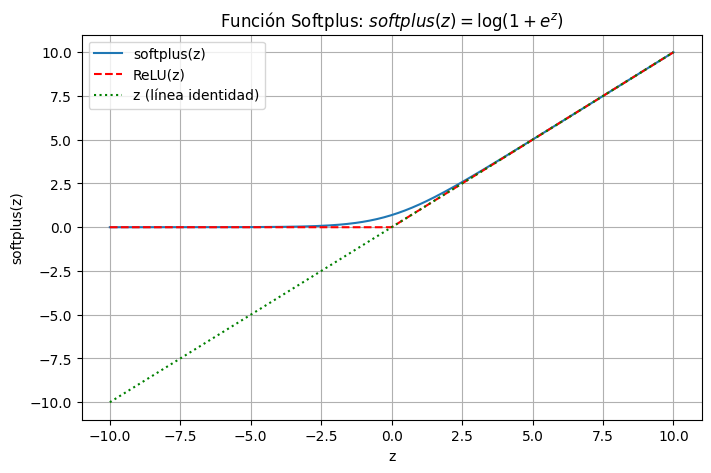

In [19]:
import numpy as np

import matplotlib.pyplot as plt

z = np.linspace(-10, 10, 400)
softplus = np.log1p(np.exp(z))  # log(1 + exp(z))

plt.figure(figsize=(8, 5))
plt.plot(z, softplus, label='softplus(z)')
plt.plot(z, np.maximum(0, z), 'r--', label='ReLU(z)')
plt.plot(z, z, 'g:', label='z (línea identidad)')
plt.title('Función Softplus: $softplus(z) = \log(1 + e^{z})$')
plt.xlabel('z')
plt.ylabel('softplus(z)')
plt.legend()
plt.grid(True)
plt.savefig(r'C:\Users\marco\Downloads\Función softplus.png')
plt.show()


Por último, si quieres asegurar que las predicciones estén dentro de un rango específico, puedes usar **sigmoid** (para valores entre 0 y 1) o **tanh** (entre –1 y 1) y escalar los objetivos acordemente. 

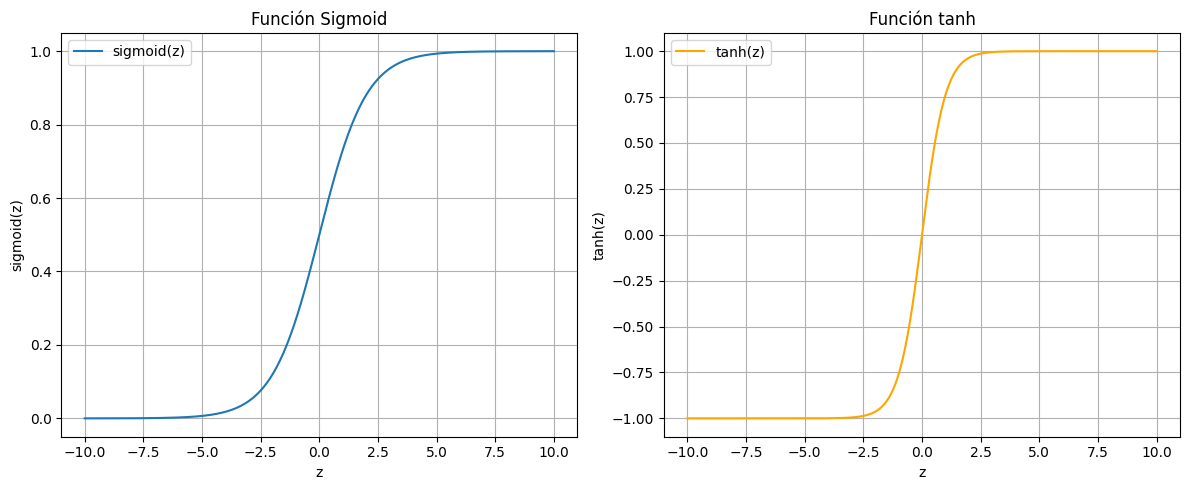

In [20]:
import numpy as np

import matplotlib.pyplot as plt

z = np.linspace(-10, 10, 400)
sigmoid = 1 / (1 + np.exp(-z))
tanh = np.tanh(z)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de la función sigmoid
axs[0].plot(z, sigmoid, label='sigmoid(z)')
axs[0].set_title('Función Sigmoid')
axs[0].set_xlabel('z')
axs[0].set_ylabel('sigmoid(z)')
axs[0].grid(True)
axs[0].legend()

# Gráfico de la función tanh
axs[1].plot(z, tanh, label='tanh(z)', color='orange')
axs[1].set_title('Función tanh')
axs[1].set_xlabel('z')
axs[1].set_ylabel('tanh(z)')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.savefig(r"C:\Users\marco\Downloads\sigmoid_vs_tanh.jpg")
plt.show()

Lamentablemente, **`MLPRegressor` no soporta funciones de activación en la capa de salida**.  



# ⚠ **Advertencia**  
Construir y entrenar una MLP estándar con Scikit-Learn en pocas líneas de código es muy conveniente, pero sus capacidades son limitadas. 

Por eso, más adelante en este capítulo pasaremos a **Keras**.  



La clase **`MLPRegressor`** usa el *la raíz del error cuadrático medio (RMSE)*, que suele ser adecuado para regresión. 

Sin embargo, si hay muchos *outliers* en los datos, podrías preferir el *error absoluto medio (MAE)* o la **pérdida de Huber**, que combina MSE y MAE: es cuadrática para errores menores que un umbral **δ** (típicamente 1) y lineal para errores mayores.

 La parte lineal la hace menos sensible a *outliers* que el MSE, mientras que la parte cuadrática permite una convergencia más rápida que el MAE. 

No obstante, **`MLPRegressor` solo soporta RMSE**.  



La **Tabla 10-1** resume la arquitectura típica de una MLP para regresión.  

| **Hiperparámetro**         | **Valor típico**                                                                 |
|----------------------------|----------------------------------------------------------------------------------|
| N° de capas ocultas        | Depende del problema (usualmente 1 a 5)                                          |
| N° de neuronas por capa    | Depende del problema (usualmente 10 a 100)                                       |
| N° de neuronas de salida   | 1 por dimensión de predicción                                                    |
| Activación en capas ocultas| ReLU                                                                             |
| Activación en salida       | Ninguna, ReLU/softplus (salidas positivas) o sigmoid/tanh (salidas acotadas)     |
| Función de pérdida         | MSE, o Huber si hay *outliers*                                                   |




# Práctica de codificación  

Esta es una **secuencia didáctica** para practicar la implementación de **MLPs para regresión** en Python, basada en el texto anterior. 

La secuencia está diseñada para avanzar desde conceptos básicos hasta técnicas más avanzadas, con ejercicios prácticos en cada etapa.

---



## **Secuencia Didáctica: MLPs para Regresión en Python**  
**Objetivo:** Implementar y optimizar una red neuronal multicapa (*MLP*) para problemas de regresión usando `scikit-learn` y `Keras`.  



### **1. Introducción a los Datos y Preprocesamiento**  
**Objetivo:** Familiarizarse con el dataset y preparar los datos para el modelo.  



**Ejercicios:**  
1. **Cargar y explorar el dataset**  


In [21]:

from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing()
housing.keys() 

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [25]:
housing.data,  housing.data.shape 

(array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 (20640, 8))

In [26]:
df = pd.DataFrame(housing.data, columns=housing.feature_names) # Convertir el arreglo de predictores en dataframe 
df["Target"] = housing.target # adicional la variable objetivo al dataframe 
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [27]:
df.describe()



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010



2. **División del dataset (train/validation/test)**  


In [28]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42
)




3. **Estandarización de características**  


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)




---

### **2. Implementación Básica con `MLPRegressor` (Scikit-Learn)**  
**Objetivo:** Entrenar un primer modelo de MLP y evaluar su rendimiento.  

**Ejercicios:**  
1. **Entrenar un MLP básico**  


In [47]:
%%time 
from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
mlp_reg.fit(X_train_scaled, y_train)



CPU times: total: 9.64 s
Wall time: 10 s


,loss,'squared_error'
,hidden_layer_sizes,"[50, 50, ...]"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True



2. **Evaluar el modelo (RMSE)**  


In [48]:
from sklearn.metrics import root_mean_squared_error

y_pred = mlp_reg.predict(X_valid_scaled)
rmse = root_mean_squared_error(y_valid, y_pred)
print(f"RMSE: {rmse:.3f}")  # Debería ser ~0.505



RMSE: 0.505



3. **Experimentar con diferentes arquitecturas**  
   - Probar con más/menos capas ocultas.  
   - Cambiar el número de neuronas (ej. `[100, 50]`).  
   - Observar cómo afecta al rendimiento.  





### **3. Optimización del Modelo**  
**Objetivo:** Mejorar el rendimiento del MLP ajustando hiperparámetros.  

**Ejercicios:**  
1. **Ajustar la tasa de aprendizaje y el optimizador**  


In [54]:
%%time 
mlp_reg = MLPRegressor(
    hidden_layer_sizes=[50, 50, 50],
    activation="tanh",
    solver="adam",  # Usar Adam en lugar de SGD
    learning_rate_init=0.001,  # Tasa de aprendizaje más baja
    max_iter=1000,  # Más épocas
    random_state=42
)
mlp_reg.fit(X_train_scaled, y_train)



CPU times: total: 23.9 s
Wall time: 24.6 s


,loss,'squared_error'
,hidden_layer_sizes,"[50, 50, ...]"
,activation,'tanh'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True


In [55]:
from sklearn.metrics import root_mean_squared_error

y_pred = mlp_reg.predict(X_valid_scaled)
rmse = root_mean_squared_error(y_valid, y_pred)
print(f"RMSE: {rmse:.3f}")  # Debería ser ~0.505



RMSE: 0.513



2. **Regularización (L2) para evitar overfitting** 

In [56]:
 
mlp_reg = MLPRegressor(
    hidden_layer_sizes=[50, 50, 50],
    alpha=0.01,  # Factor de regularización L2
    random_state=42
)
mlp_reg.fit(X_train_scaled, y_train)



,loss,'squared_error'
,hidden_layer_sizes,"[50, 50, ...]"
,activation,'relu'
,solver,'adam'
,alpha,0.01
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True


In [57]:
from sklearn.metrics import root_mean_squared_error

y_pred = mlp_reg.predict(X_valid_scaled)
rmse = root_mean_squared_error(y_valid, y_pred)
print(f"RMSE: {rmse:.3f}")  # Debería ser ~0.505



RMSE: 0.539



3. **Early Stopping (usando `validation_fraction`)**  


In [59]:
%%time 
mlp_reg = MLPRegressor(
    hidden_layer_sizes=[50, 50, 50],
    early_stopping=True,  # Detener si no mejora
    validation_fraction=0.2,  # 20% de validación
    random_state=42
   )
mlp_reg.fit(X_train_scaled, y_train)



CPU times: total: 2.62 s
Wall time: 2.45 s


,loss,'squared_error'
,hidden_layer_sizes,"[50, 50, ...]"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True


In [60]:
from sklearn.metrics import root_mean_squared_error

y_pred = mlp_reg.predict(X_valid_scaled)
rmse = root_mean_squared_error(y_valid, y_pred)
print(f"RMSE: {rmse:.3f}")  # Debería ser ~0.505



RMSE: 0.549





### **4. Implementación con Keras (TensorFlow) para Mayor Flexibilidad**  
**Objetivo:** Usar Keras para modelos más personalizables (ej. activaciones en la capa de salida).  

**Ejercicios:**  
1. **Crear un MLP con Keras**  


In [61]:
%%time 
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(50, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(1)  # Sin activación (regresión)
])

model.compile(loss="mse", optimizer="adam", metrics=["mse"])
   


c:\Users\marco\Documentos\investigacion\ml_intro\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



2. **Entrenar y evaluar el modelo** 

In [63]:
 
%%time 
history = model.fit(
       X_train_scaled, y_train,
       epochs=100,
       validation_data=(X_valid_scaled, y_valid)
   )

y_pred = model.predict(X_test_scaled)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"RMSE (Keras): {rmse:.3f}")



Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2218 - mse: 0.2218 - val_loss: 0.2799 - val_mse: 0.2799
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2154 - mse: 0.2154 - val_loss: 0.3049 - val_mse: 0.3049
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2119 - mse: 0.2119 - val_loss: 0.2753 - val_mse: 0.2753
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2117 - mse: 0.2117 - val_loss: 0.3781 - val_mse: 0.3781
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2161 - mse: 0.2161 - val_loss: 0.5766 - val_mse: 0.5766
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2042 - mse: 0.2042 - val_loss: 0.2867 - val_mse: 0.2867
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2126 - mse: 0.2126 - val_loss: 0.2852 - val_mse: 0.2852
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2184 - mse: 0.2184 - val_loss: 0.3271 - val_mse: 0.3271
Epoch 9/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/


3. **Probar diferentes funciones de activación en la salida**  
   - **ReLU/Softplus** (si la salida debe ser positiva): 

In [64]:
 
%%time 
keras.layers.Dense(1, activation="softplus")


CPU times: total: 0 ns
Wall time: 2 ms


<Dense name=dense_4, built=False>

   - **Sigmoid/Tanh** (si la salida debe estar acotada):

In [65]:
%%time   
keras.layers.Dense(1, activation="sigmoid")  # Escalar 'y' entre 0 y 1



CPU times: total: 0 ns
Wall time: 1 ms


<Dense name=dense_5, built=False>




### **5. Experimentación Avanzada (Opcional)**  
**Objetivo:** Profundizar en técnicas avanzadas para mejorar el modelo.  

**Ejercicios:**  
1. **Usar Batch Normalization** 

In [66]:
 
model.add(keras.layers.BatchNormalization())



2. **Probar Dropout para regularización** 

In [67]:
 
model.add(keras.layers.Dropout(0.3))



3. **Optimización con GridSearchCV (Scikit-Learn)**  


In [69]:


%%time
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    "hidden_layer_sizes": [(50,), (100, 50)],  # Arquitecturas de la red
    "alpha": [0.0001, 0.001, 0.01],             # Término de regularización L2
    "activation": ["relu", "tanh"],             # Funciones de activación
    "solver": ["adam", "lbfgs"]                 # Optimizadores
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(
    MLPRegressor(max_iter=500, random_state=42),
    param_grid,
    cv=3,                      # Validación cruzada con 3 folds
    scoring="neg_mean_squared_error",  # Métrica a optimizar (MSE negativo)
    n_jobs=-1                  # Usar todos los núcleos del CPU
)

# Ajustar a los datos de entrenamiento
grid_search.fit(X_train_scaled, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)


Mejores hiperparámetros encontrados:
{'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50), 'solver': 'adam'}
CPU times: total: 20.8 s
Wall time: 6min 10s
CPU times: total: 20.8 s
Wall time: 6min 10s


In [70]:
from sklearn.metrics import root_mean_squared_error, r2_score

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Predecir en train y test
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)  # Asegúrate de escalar X_test igual que X_train

# Calcular métricas
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Imprimir resultados
print("\nDesempeño del modelo afinado:")
print(f"RMSE en entrenamiento: {train_rmse:.4f}")
print(f"RMSE en prueba: {test_rmse:.4f}")
print(f"R² en entrenamiento: {train_r2:.4f}")
print(f"R² en prueba: {test_r2:.4f}")


Desempeño del modelo afinado:
RMSE en entrenamiento: 0.4926
RMSE en prueba: 0.5259
R² en entrenamiento: 0.8190
R² en prueba: 0.7910





## **Resumen de la Secuencia**  
1. **Preprocesamiento**: Estandarización y división de datos.  
2. **Primer modelo con Scikit-Learn**: Entrenamiento y evaluación básica.  
3. **Optimización**: Ajuste de hiperparámetros y regularización.  
4. **Keras**: Modelos más flexibles y personalizables.  
5. **Avanzado**: BatchNorm, Dropout y búsqueda de hiperparámetros.  

Esta secuencia permite pasar de **conceptos básicos** a **técnicas avanzadas**, con ejercicios prácticos en cada paso. ¿Quieres que profundicemos en algún tema en particular?

# Referentes en Deep Learning 

Aquí tienes **10 referentes clave** en *deep learning* para enriquecer tu docencia e investigación en matemáticas, ciencia de datos y métodos cuanti/cuali en la Universidad de Antioquia (Seccional Bajo Cauca). Estos recursos incluyen cursos, libros, investigadores y enfoques innovadores, basados en las tendencias actuales y futuras del campo :





### **1. Cursos y Programas Académicos**  
- **Curso "Bases Matemáticas del Deep Learning" (TECH Universidad Tecnológica)**:  
  Enfocado en fundamentos matemáticos (álgebra lineal, optimización, backpropagation) y aplicaciones prácticas con metodología *Relearning*. Ideal para docencia en matemáticas aplicadas .  
- **Track en Ciencia de Datos (Colegio Bourbaki)**:  
  Cubre desde probabilidad bayesiana hasta redes neuronales avanzadas (CNNs, Transformers, GANs). Incluye proyectos prácticos y evaluación basada en problemas reales .  



### **2. Investigadores y Expertos**  
- **Geoffrey Hinton & Yann LeCun**:  
  Pioneros en redes neuronales y aprendizaje no supervisado. Explora sus trabajos recientes en *capsule networks* y autoaprendizaje (*self-supervised learning*) .  
- **Gary Marcus**:  
  Crítico del *deep learning* puro; promueve modelos híbridos (neuro-simbólicos) que integran razonamiento abstracto y conocimiento previo. Útil para discutir limitaciones del enfoque actual .  



### **3. Frameworks y Herramientas** 

 
- **TensorFlow/Keras y PyTorch**:  
  Los más usados en docencia. PyTorch es ideal para investigación por su flexibilidad en redes personalizadas .  
- **Libro: "Deep Learning" (Ian Goodfellow et al.)**:  
  Biblia técnica que cubre fundamentos matemáticos (gradientes, regularización) y arquitecturas avanzadas (GANs, RNNs) .  



### **4. Tendencias Futuras**  
- **Aprendizaje Autosupervisado (*Self-Supervised Learning*)**:  
  Reducción de dependencia de datos etiquetados. Ejemplo: modelos de lenguaje como BERT/GPT .  
- **Redes Generativas (GANs y Difusión Estable)**:  
  Aplicaciones en generación de imágenes y datos sintéticos para investigación cualitativa .  



### **5. Métodos Híbridos para Investigación**  
- **Física + Deep Learning**:  
  Modelos que integran leyes físicas en redes neuronales (ej.: predicción climática). Relevante para proyectos interdisciplinarios .  
- **Ética en IA**:  
  Módulos sobre sesgos algorítmicos y justicia social, clave en investigación cualitativa .  



### **6. Recursos Locales (Colombia)**  
- **Grupo GIPI (UdeA)**:  
  Enfoque en ingeniería de procesos con IA. Colaboración potencial para proyectos aplicados .  
- **Sergio Gutiérrez (UdeA)**:  
  Investigador en redes neuronales para detección de intrusiones. Sus publicaciones ofrecen casos prácticos en seguridad .  

---



### **Recomendaciones para Implementación** 

 
1. **En Docencia**: Usa ejemplos de *few-shot learning* (aprendizaje con pocos datos) para clases en entornos con recursos limitados .  


2. **En Investigación**: Combina técnicas cuanti (análisis de RMSE en modelos) con cuali (interpretación de resultados con *attention maps* en CNNs) . 

 
3. **Talleres Prácticos**:  
   - "Cómo entrenar un modelo de NLP con BERT" (usando datasets en español).  
   - "Visualización de gradientes en redes convolucionales" (para explicar matemáticas subyacentes) .  



Estos referentes te permitirán actualizar tus cursos, integrar investigación aplicada y fomentar un enfoque crítico en el uso de IA. 

Para profundizar, explora los enlaces directos a los recursos citados.

# Referentes en la constitución de este cuaderno  

* [End to End machine learning project][https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb]